Notes from https://www.youtube.com/watch?v=epI9W3MZ3Ts

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

from xgboost import XGBRegressor # model algorithm - predict classifications


In [2]:
# loading data

data=pd.read_csv("Supermarket_Delta_Data.csv")
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [12]:
# number of data points and number of features

data.info()
# object data type = categorical feature

# statistical measures about the data

data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


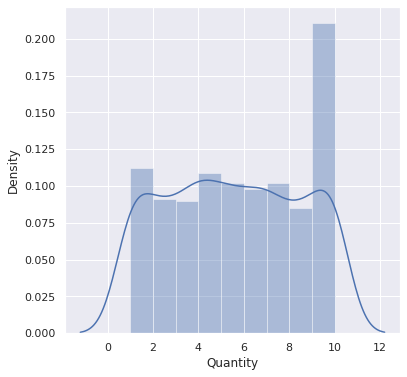

In [11]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['Quantity'])
plt.show()

# **Categorical Features**

We need to check the categorical features because we want to predict the busiest day of the supermarket in 2020. This "day" feature is a string and it belongs in the categorical value. Below you can see that I have assigned the value to "weekday"

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


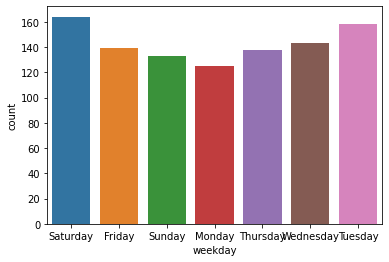

In [10]:
# visualising which days of the week sales happen
# change the date variable to date

import seaborn as sns
data['Date'] = pd.to_datetime(data['Date'])
data['weekday'] = data['Date'].dt.day_name()

sns.countplot(data['weekday'])

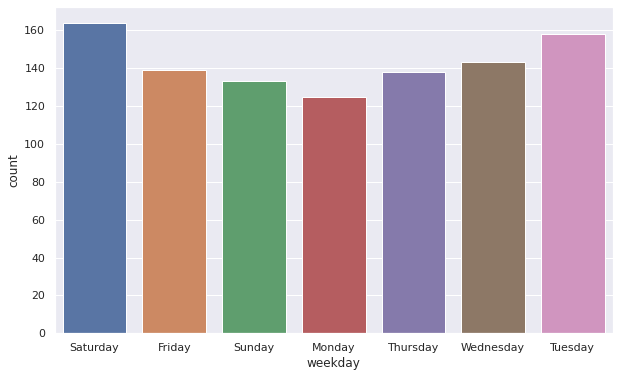

In [16]:
# weekday column
plt.figure(figsize=(10,6))
sns.countplot(x='weekday', data=data)
plt.show()

In [21]:
# divide data into features/attributes and target variable (label)

# split dataset in features and target variable
feature_cols = ['Quantity', 'Total', 'gross income', 'Unit price','Date']
X = data[feature_cols] # Features
y = data.Date # Target variable


# Transforming categorical values into numerical values

Because 'weekday' is a string value (all categorical values = string), the libraries do not recognise it. Hence we must convert it first, into a numerical value. To do that, we assign a label encoder.



In [26]:
encoder = LabelEncoder()
data['weekday'] = encoder.fit_transform(data['weekday']) # this will transform all categorical values into corresponding labels
data['Invoice ID'] = encoder.fit_transform(data['Invoice ID']) 
data['Branch'] = encoder.fit_transform(data['Branch'])
data['City'] = encoder.fit_transform(data['City'])
data['Customer type'] = encoder.fit_transform(data['Customer type'])
data['Gender'] = encoder.fit_transform(data['Gender'])
data['Product line'] = encoder.fit_transform(data['Product line'])
data['Date'] = encoder.fit_transform(data['Date'])
data['Time'] = encoder.fit_transform(data['Time'])
data['Payment'] = encoder.fit_transform(data['Payment'])
data.head() # printing the first 5 rows to check if transformation was successful

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,weekday
0,814,0,2,0,0,3,74.69,7,26.1415,548.9715,4,146,2,522.83,4.761905,26.1415,9.1,2
1,142,2,1,1,0,0,15.28,5,3.8200,80.2200,66,23,0,76.40,4.761905,3.8200,9.6,0
2,653,0,2,1,1,4,46.33,7,16.2155,340.5255,61,155,1,324.31,4.761905,16.2155,7.4,3
3,18,0,2,0,1,3,58.22,8,23.2880,489.0480,26,485,2,465.76,4.761905,23.2880,8.4,3
4,339,0,2,1,1,5,86.31,7,30.2085,634.3785,38,29,2,604.17,4.761905,30.2085,5.3,0


# Printing the data with the weekday column

0 = Friday

1 = Monday

2 = Saturday

3 = Sunday

4 = Thursday

5 = Tuesday

6 = Wednesday

In [37]:
data.head(40)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,weekday
0,814,0,2,0,0,3,74.69,7,26.1415,548.9715,4,146,2,522.83,4.761905,26.1415,9.1,2
1,142,2,1,1,0,0,15.28,5,3.8200,80.2200,66,23,0,76.40,4.761905,3.8200,9.6,0
2,653,0,2,1,1,4,46.33,7,16.2155,340.5255,61,155,1,324.31,4.761905,16.2155,7.4,3
3,18,0,2,0,1,3,58.22,8,23.2880,489.0480,26,485,2,465.76,4.761905,23.2880,8.4,3
4,339,0,2,1,1,5,86.31,7,30.2085,634.3785,38,29,2,604.17,4.761905,30.2085,5.3,0
5,733,2,1,1,1,0,85.39,7,29.8865,627.6165,83,393,2,597.73,4.761905,29.8865,4.1,1
6,315,0,2,0,0,0,68.84,6,20.6520,433.6920,55,214,2,413.04,4.761905,20.6520,5.8,1
7,264,2,1,1,0,4,73.56,10,36.7800,772.3800,54,77,2,735.60,4.761905,36.7800,8.0,3
8,702,0,2,0,0,3,36.26,2,3.6260,76.1460,9,341,1,72.52,4.761905,3.6260,7.2,4
9,726,1,0,0,0,2,54.84,3,8.2260,172.7460,50,159,1,164.52,4.761905,8.2260,5.9,6


# Pre-train and test data: splitting between features and target

First we must split between features and target. Here our target is 'weekday' because this is what we want to predict. The steps:

1. Assign X for features and Y for target
2. Remove the column from X (feature). If we remove a column, then axis = 1. If we remove a row, then axis = 0
3. Store the column in Y (target)

In [27]:
X = data.drop(columns = 'weekday', axis=1)
Y = data['weekday']
print(X)

     Invoice ID  Branch  City  Customer type  Gender  Product line  \
0           814       0     2              0       0             3   
1           142       2     1              1       0             0   
2           653       0     2              1       1             4   
3            18       0     2              0       1             3   
4           339       0     2              1       1             5   
..          ...     ...   ...            ...     ...           ...   
995         153       2     1              1       1             3   
996         250       1     0              1       0             4   
997         767       0     2              0       1             2   
998         308       0     2              1       1             4   
999         935       0     2              0       0             1   

     Unit price  Quantity   Tax 5%      Total  Date  Time  Payment    cogs  \
0         74.69         7  26.1415   548.9715     4   146        2  522.83   
1  

In [28]:
print(Y)

0      2
1      0
2      3
3      3
4      0
      ..
995    5
996    2
997    2
998    0
999    1
Name: weekday, Length: 1000, dtype: int64


# Pre-train and test data: splitting data into train and test

1. Split the data into train and test. Name them X_train, X_test, Y_train, Y_test
2. Take 20% of the data for testing (hence test_size=0.2)
3. use '2' as an identification number for splitting. This will split the data into one category. If we use '3', for instance, the splitting will be done in another manner/category

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(1000, 17) (800, 17) (200, 17)


# Train and test data: machine learning model training

Use XGBoost Regressor

In [30]:
regressor = XGBRegressor()
regressor.fit(X_train, Y_train)

[09:10:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

# Evaluation



In [31]:
# prediction on training data
training_data_prediction = regressor.predict(X_train) # feeding the X_train values to the regressor to predict them, then store the prediction in the variable called 'training_data_prediction'

In [32]:
# finding the R squared value
# R squared value is useful for checking the preformance of a model
r2_train = metrics.r2_score(Y_train, training_data_prediction) # predicts how close is the value from the original model (Y_train) to the actual prediction



In [33]:
print('R Squared value = ', r2_train) # if the value is close to 1, it is a good model

R Squared value =  0.7545209267090396


In [34]:
# prediction on testing data
testing_data_prediction = regressor.predict(X_test) # feeding the X_test values to the regressor to predict them, then store the prediction in the variable called 'testing_data_prediction'

In [35]:
# finding the R squared value for testing data
# R squared value is useful for checking the preformance of a model
r2_test = metrics.r2_score(Y_test, testing_data_prediction) # predicts how close is the value from the original model (Y_test) to the actual prediction

In [36]:
print('R Squared value = ', r2_test) # if the value is close to 1, it is a good model

R Squared value =  0.6639138980404211
